In [1]:
import csv
import string
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img
from tensorflow.keras.utils import to_categorical

## Dataset 

This program using MNIST Sign Language Dataset, containing 28x28 images of hands showing the 26 letters of english sign alphabet. The data presented in csv format and already divided into training and testing dataset 

In [2]:
training_file = './sign_mnist_train.csv'
validation_file = './sign_mnist_test.csv'

In [3]:
# Open the training dataset and show the first line(header) and the second line  
with open(training_file) as files:
  line = files.readline()
  print(f"First line (header) looks like this:\n{line}")

  line = files.readline()
  print(f"Each subsequent line (data points) look like this:\n{line}")


First line (header) looks like this:
label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pix

## Dataset Preprocessing 
Notice that the data is in csv format. The parsing function is used to convert the inpput file into 2 numpy arrays, one containing labels and one containing 28x28 pixels representation of each image.

 A couple of things to keep in mind:
- The first line contains the column headers, so we ignored it.
- Each successive line contains 785 comma-separated values between 0 and 255
  - The first value is the label
  - The rest are the pixel values for that picture

In [16]:
def parse_data_from_input(filename):
    with open(filename) as file:
        labels = []
        pixels = []

        with open(filename,'r') as file:
            csv_reader = csv.reader(file, delimiter=',')

            # Skip the data header
            next(csv_reader)

            for row in csv_reader:
                # Assign the first column of the row as an image label 
                label = float(row[0])

                # Assign the rest columns  of the row as image features and do some preprosesing by reshaping(28x28) and normalizing pixel values(0-1)
                pixel_values = np.array(row[1:],dtype=float) / 255.0
                pixel_values = pixel_values.reshape((28,28))

                # Assign label and pixel values to the list 
                labels.append(label)
                pixels.append(pixel_values)

    # Convert list into numpy arrays 
    labels = np.array(labels, dtype=float)
    images = np.array(pixels, dtype=float)

    return images, labels 

In [17]:
training_images, training_labels = parse_data_from_input(training_file)
validation_images, validation_labels = parse_data_from_input(validation_file)

print(f"Training images has shape: {training_images.shape} and dtype: {training_images.dtype}")
print(f"Training labels has shape: {training_labels.shape} and dtype: {training_labels.dtype}")
print(f"Validation images has shape: {validation_images.shape} and dtype: {validation_images.dtype}")
print(f"Validation labels has shape: {validation_labels.shape} and dtype: {validation_labels.dtype}")

Training images has shape: (27455, 28, 28) and dtype: float64
Training labels has shape: (27455,) and dtype: float64
Validation images has shape: (7172, 28, 28) and dtype: float64
Validation labels has shape: (7172,) and dtype: float64


In [25]:
print(training_images[0])

[[0.41960784 0.4627451  0.49803922 0.5254902  0.54509804 0.56078431
  0.57254902 0.58823529 0.6        0.61176471 0.61960784 0.62745098
  0.63921569 0.64705882 0.62352941 0.65098039 0.65882353 0.66666667
  0.66666667 0.67058824 0.67058824 0.67058824 0.6745098  0.67058824
  0.67058824 0.66666667 0.66666667 0.6627451 ]
 [0.43529412 0.4745098  0.50588235 0.52941176 0.55294118 0.56470588
  0.58039216 0.59215686 0.60392157 0.61568627 0.62745098 0.63921569
  0.64313725 0.66666667 0.46666667 0.59607843 0.67058824 0.67058824
  0.66666667 0.67058824 0.6745098  0.6745098  0.6745098  0.6745098
  0.6745098  0.67058824 0.67058824 0.66666667]
 [0.44313725 0.48235294 0.51372549 0.5372549  0.55686275 0.56862745
  0.58823529 0.59607843 0.60784314 0.61960784 0.63137255 0.63921569
  0.64313725 0.6745098  0.41176471 0.55686275 0.66666667 0.67058824
  0.67058824 0.67058824 0.6745098  0.6745098  0.67843137 0.67843137
  0.6745098  0.67058824 0.67058824 0.67058824]
 [0.45490196 0.49019608 0.52156863 0.5450980

# Visualizing the Numpy Arrays 

After converted the csv data into format that is compatible with computer vision task, let's visualize it to see how the actual dataset image look like 

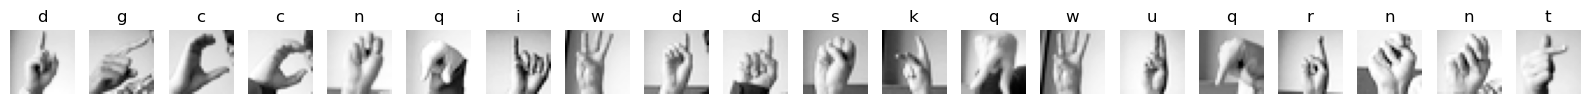

In [18]:
# Plot a sample of 10 images from the training set
def plot_categories(training_images, training_labels):
  fig, axes = plt.subplots(1, 20, figsize=(16, 15))
  axes = axes.flatten()
  letters = list(string.ascii_lowercase)

  for k in range(20):
    img = training_images[k]
    img = np.expand_dims(img, axis=-1)
    img = array_to_img(img)
    ax = axes[k]
    ax.imshow(img, cmap="Greys_r")
    ax.set_title(f"{letters[int(training_labels[k])]}")
    ax.set_axis_off()

  plt.tight_layout()
  plt.show()

plot_categories(training_images, training_labels)

## Creating the Image Generator for the CNN

After converting the data into numpy array, it's time to create ImageDataGenerator for traingin and testing the model

In [42]:
def train_val_generators(training_images, training_labels, validation_images, validation_labels):
    
    # expanding the dimension of images so that it can fit in the CNN 
    training_images = np.array(np.expand_dims(training_images, axis = -1))
    validation_images = np.array(np.expand_dims(validation_images, axis = -1))

    # Instantiate the ImageDataGenerator Class 
    train_datagen = ImageDataGenerator(
        rescale = 1./255.,
    )
    # Pass in the appropriate arguments to the flow method
    train_generator = train_datagen.flow(
        x = training_images,
        y = training_labels, 
        batch_size = 64
    )

    # Instantiate the ImageDataGenerator Class 
    validation_datagen = ImageDataGenerator(
        rescale = 1./255.
    )
    # Pass in the appropriate arguments to the flow method
    validation_generator = validation_datagen.flow(
        x = validation_images,
        y = validation_labels, 
        batch_size = 64
    )

    return train_generator, validation_generator

In [43]:
train_generator, validation_generator = train_val_generators(training_images, training_labels, validation_images, validation_labels)

print(f"Images of training generator have shape: {train_generator.x.shape}")
print(f"Labels of training generator have shape: {train_generator.y.shape}")
print(f"Images of validation generator have shape: {validation_generator.x.shape}")
print(f"Labels of validation generator have shape: {validation_generator.y.shape}")

Images of training generator have shape: (27455, 28, 28, 1)
Labels of training generator have shape: (27455,)
Images of validation generator have shape: (7172, 28, 28, 1)
Labels of validation generator have shape: (7172,)


## Model Training and Evaluation

The CNN Architecture Model will have :

    1. 2 Conv2D Layers with 3x3 filter size, ReLu activation function, 16 and 32 number of filters respectively 
    2. 2 Max Pooling Layer with 2x2 filter size
    3. 1 Dropout Layer with dropout rate 0.2
    4. 2 Dense layer, the first one have 512 nodes and ReLu activation function, while the second one act as output of the network with activation function softmax

Model Training :

    1. Using Adam Optimizer because it's ability to automatically set the learning rate
    2. using Sparse Categorical Crossentropy as loss function for multiclass classification
    3. Traned in 15 Epochs 

In [44]:
def create_model():

  # Define the model
  model = tf.keras.models.Sequential ([
      tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (28,28,1)),
      tf.keras.layers.MaxPool2D(2,2),
      tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
      tf.keras.layers.MaxPool2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation = 'relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(26, activation = 'softmax')
  ])

  # Compile the model
  model.compile(optimizer = 'adam',
                loss = 'sparse_categorical_crossentropy',
                metrics=['accuracy'])

  return model

In [45]:
# Save your model
model = create_model()

# Train your model
history = model.fit(train_generator,
                    epochs=15,
                    validation_data=validation_generator)

Epoch 1/15
429/429 [==============================] - 12s 25ms/step - loss: 3.1889 - accuracy: 0.0418 - val_loss: 3.1951 - val_accuracy: 0.0291
Epoch 2/15
429/429 [==============================] - 11s 27ms/step - loss: 2.9015 - accuracy: 0.1341 - val_loss: 2.1685 - val_accuracy: 0.3650
Epoch 3/15
429/429 [==============================] - 11s 27ms/step - loss: 1.6592 - accuracy: 0.4846 - val_loss: 1.4675 - val_accuracy: 0.5245
Epoch 4/15
429/429 [==============================] - 12s 28ms/step - loss: 1.1394 - accuracy: 0.6334 - val_loss: 1.0956 - val_accuracy: 0.6260
Epoch 5/15
429/429 [==============================] - 11s 26ms/step - loss: 0.8361 - accuracy: 0.7288 - val_loss: 0.9450 - val_accuracy: 0.6778
Epoch 6/15
429/429 [==============================] - 12s 27ms/step - loss: 0.6380 - accuracy: 0.7860 - val_loss: 0.7546 - val_accuracy: 0.7467
Epoch 7/15
429/429 [==============================] - 12s 27ms/step - loss: 0.4982 - accuracy: 0.8293 - val_loss: 0.7151 - val_accuracy:

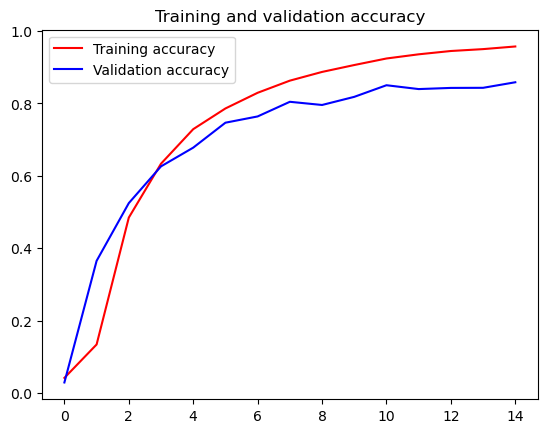

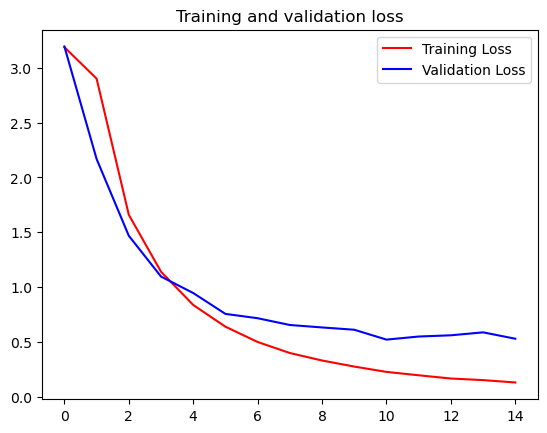

In [49]:
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()


In [48]:
model.save('my_model.h5')

c:\Users\irsya\anaconda3\envs\tf\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
